## Anushka Gami, Ashwini Sarvepalli and Angela Watters
### UFO Sightings around the world
#### https://datasetsearch.research.google.com/search?src=2&query=UFO%20Sightings&docid=L2cvMTFqY2s3ZndfaA%3D%3D


In [1]:
# import usual things
import pandas as pd
import bqplot
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt

In [2]:
ufo = pd.read_csv("ufo_sighting_data.csv",
dtype={"length_of_encounter_seconds": "string", "latitude": "string"})


ufo.head()

#changed data type to string because it wouldn't plot. 

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
#plt.plot(ufo['longitude'],ufo['latitude'],'.')
#plt.show()

#This wouldn't plot initially so I had to change the reading in of the data with dtype. 

In [3]:
ufo["latitude"] = pd.to_numeric(ufo["latitude"], errors="coerce")
ufo["length_of_encounter_seconds"] = pd.to_numeric(ufo["length_of_encounter_seconds"], errors="coerce")
ufo.dropna(axis=0,inplace=True)
pd.options.display.float_format = '{:20,.2f}'.format
ufo.describe()

#https://www.kaggle.com/code/moosecat/world-ufo-sightings

,length_of_encounter_seconds,latitude,longitude
count,"66,516.00","66,516.00","66,516.00"
mean,"6,573.00",38.71,-95.29
std,"510,890.96",5.84,18.48
min,0.01,-37.81,-176.66
25%,30.00,34.20,-114.18
50%,180.00,39.25,-89.60
75%,600.00,42.34,-80.40
max,"82,800,000.00",72.70,153.10


In [4]:
ufo['date_documented'] = pd.Series([
    pd.to_datetime(
        date,
        format = '%Y%m%d',
        errors='coerce'
    ) for date in ufo['date_documented']
])

#https://notebook.community/valter-lisboa/ufo-notebooks/Python3/.ipynb_checkpoints/ufo-sample-python3-checkpoint

In [5]:
ufo.columns

Index(['Date_time', 'city', 'state/province', 'country', 'UFO_shape',
       'length_of_encounter_seconds', 'described_duration_of_encounter',
       'description', 'date_documented', 'latitude', 'longitude'],
      dtype='object')

In [6]:
stats = ufo.groupby("latitude")["length_of_encounter_seconds"].describe()
stats.head()

#Finishing up: Visualizing Datatypes - Tabular data with Pandas
#https://uiuc-ischool-dataviz.github.io/is445_oauoag_fall2022/nbv.html?notebook_name=%2Fis445_oauoag_fall2022%2Fweek03%2Fprep_notebook_week03.ipynb

,count,mean,std,min,25%,50%,75%,max
latitude,,,,,,,,
-37.81,1.00,900.00,NaN,900.00,900.00,900.00,900.00,900.00
-34.93,2.00,240.00,84.85,180.00,210.00,240.00,270.00,300.00
-34.85,1.00,5.00,NaN,5.00,5.00,5.00,5.00,5.00
-31.95,1.00,420.00,NaN,420.00,420.00,420.00,420.00,420.00
-31.43,1.00,30.00,NaN,30.00,30.00,30.00,30.00,30.00


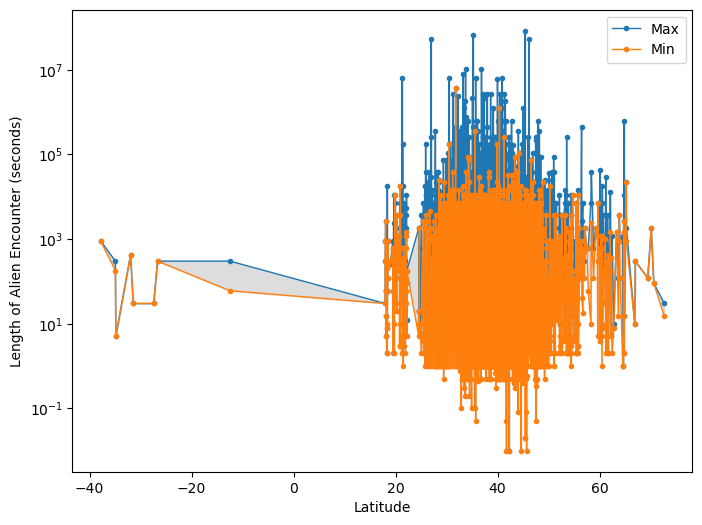

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0, label="Max")
ax.plot(stats["min"], marker='.', linewidth = 1.0, label="Min")
ax.set_xlabel("Latitude")
ax.set_ylabel("Length of Alien Encounter (seconds)")
ax.set_yscale("log")
ax.fill_between(stats.index, stats["min"], stats["max"], color = "#dddddd")

ax.legend()
plt.show()

#need to add a log.  Looks like an alien abduction. 
#need to add legend
#need to add a fill 

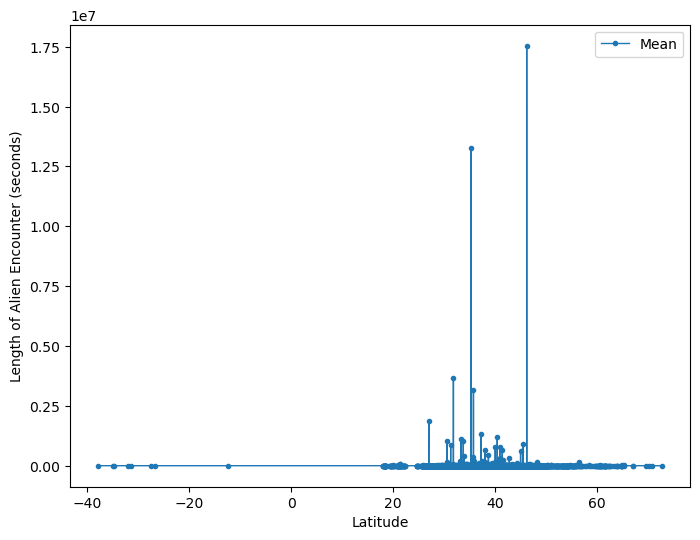

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["mean"], marker='.', linewidth = 1.0, label="Mean")
ax.set_xlabel("Latitude")
ax.set_ylabel("Length of Alien Encounter (seconds)")

ax.legend()


plt.show()

#need to add a log.  Shows what a brief encounter it was. 
#need to add legend
#need to add a fill 

In [12]:
stats2 = ufo.groupby("country")["length_of_encounter_seconds"].describe()
stats2

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
au,10.00,252.50,270.12,5.00,37.50,240.00,300.00,900.00
ca,"2,942.00","29,175.34","1,526,537.37",0.02,20.00,120.00,600.00,"82,800,000.00"
gb,11.00,"8,343.64","25,890.32",40.00,390.00,600.00,900.00,"86,400.00"
us,"63,553.00","5,527.38","406,587.79",0.01,30.00,180.00,600.00,"66,276,000.00"


In [13]:
stats2.loc['au']  

count                  10.00
mean                  252.50
std                   270.12
min                     5.00
25%                    37.50
50%                   240.00
75%                   300.00
max                   900.00
Name: au, dtype: float64

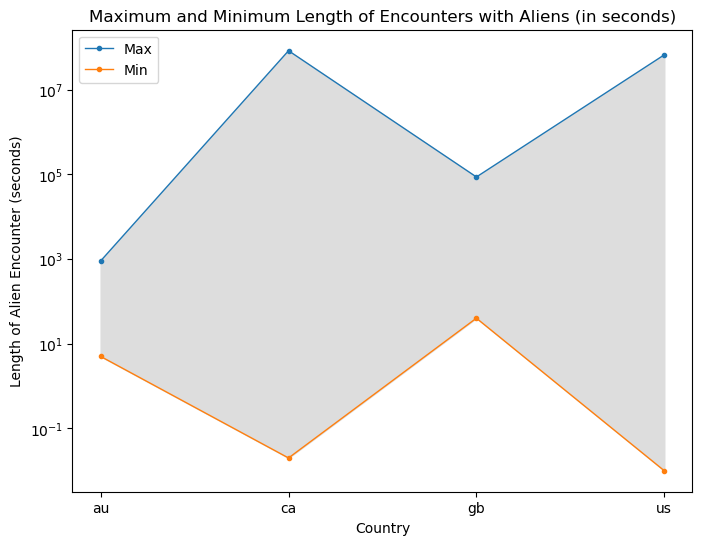

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats2["max"], marker='.', linewidth = 1.0, label="Max")
ax.plot(stats2["min"], marker='.', linewidth = 1.0, label="Min")
ax.set_title('Maximum and Minimum Length of Encounters with Aliens (in seconds)')
ax.set_xlabel("Country")
ax.set_ylabel("Length of Alien Encounter (seconds)")
ax.set_yscale("log")
ax.fill_between(stats2.index, stats2["min"], stats2["max"], color = "#dddddd")

ax.legend()
plt.savefig('max_min_encounter.png')


# Much more interesting 

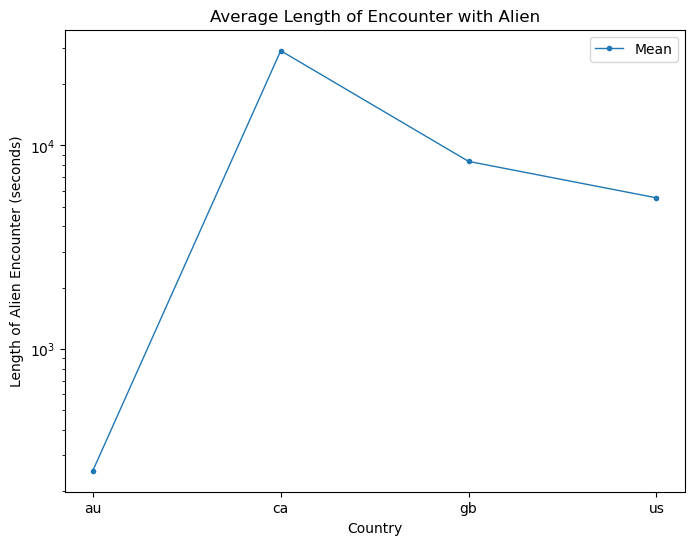

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats2["mean"], marker='.', linewidth = 1.0, label="Mean")
ax.set_title('Average Length of Encounter with Alien')
ax.set_xlabel("Country")
ax.set_ylabel("Length of Alien Encounter (seconds)")
ax.set_yscale("log")


ax.legend()
plt.show()

# So... Canada?  

In [19]:
plt.savefig('average_encounter.png')

<Figure size 640x480 with 0 Axes>

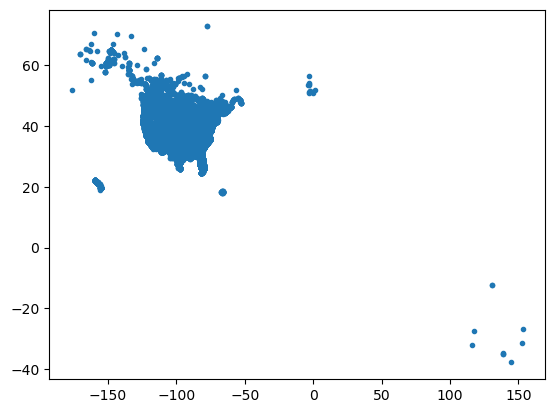

In [14]:
plt.plot(ufo['longitude'],ufo['latitude'],'.')
plt.show()

#and now this works. 

## Write Up 

My group members and I (Anushka Gami and Ashwini Sarvepalli) decided to use the "UFO Sightings around the world" dataset. It is similar to the dataset we used in class from National UFO Reporting Center, but the author added column headings and their own data to make it worldwide. We were intrigued by the questions posed on the Kaggle page like, "Do aliens work weekends?" The data has a CC0 1.0 Universal (CC0 1.0) Public Domain Dedication license. This means that all copyrights have been waved. We are allowed to use, modify and distribute without asking permission from the copyright holder. The dataset is 13.7 MB. It should not be a problem on GitHub because the file limit for the site is 100MB. 

The data records UFO sightings by the date and time, city, state or province, country, the shape of the craft in one word, the length of encounter in seconds and a description of that encounter, the date documented, and latitude and longitude. Data type was initially a challenge to use. The latitude and longitude initially could not be plotted so I sought out sources to help me convert that data and the encounter in seconds data to a string and then to numeric data. 

Then I looked at Professor Naiman's Prep-Notebook for week three and made and grouped encounter length with latitude. I looked at the stats and I plotted one plot with "max" and "min" and another of the mean of the length of the encounters by latitude. I plotted this way because I think it is interesting to see how long encounters are by placement on the globe, but the plot was messy and not very informative. In fact, the minimum/maximum chart resembled an alien craft beaming a person aboard. 

I then tried it with country and I noticed that the countries with alien sightings in the data seem to be exclusively from the English-speaking world. My plot of the minimum/maximum encounters by country is far more informative in my opinion. People in the United States and Canada have longer and briefer encounters with UFOs than people in Australia and Great Britain. However, when I plotted the mean it was clear that Canada had the longest encouters on average and Australia the least. 


It can be found at the following URL: https://datasetsearch.research.google.com/search?src=2&query=UFO%20Sightings&docid=L2cvMTFqY2s3ZndfaA%3D%3D


## Sources

National UFO Reporting Center
https://nuforc.org/about-us/

World of UFO Sightings 
https://www.kaggle.com/code/moosecat/world-ufo-sightings

USA UFO sightings (Python 3 version)
https://notebook.community/valter-lisboa/ufo-notebooks/Python3/.ipynb_checkpoints/ufo-sample-python3-checkpoint

Naiman, Jill. Prep-Notebook. Week 3. Finishing up: Visualizing Datatypes - Tabular data with Pandas
https://uiuc-ischool-dataviz.github.io/is445_oauoag_fall2022/nbv.html?notebook_name=%2Fis445_oauoag_fall2022%2Fweek03%2Fprep_notebook_week03.ipynb

Naiman, Jill. Prep-Notebook. Week 4
https://uiuc-ischool-dataviz.github.io/is445_oauoag_fall2022/nbv.html?notebook_name=%2Fis445_oauoag_fall2022%2Fweek04%2Fprep_notebook_week04.ipynb